简介：此数据集包含了近54000颗钻石的价格和其它属性，可以用于探索价格与不同属性之间的关系，并进行数据可视化。
变量含义：
- carat：克拉，钻石的克拉重
- cut：描述钻石的切割质量。订单不断增加的质量一般、良好、非常好、高级、理想
- color：钻石的颜色，D最好，J最差
- clarity：钻石中夹杂物的明显程度：（按从好到坏的顺序，FL=无缺陷，I3=3级夹杂物）FL、IF、VVS1、VVS2、VS1、VS2、SI1、SI2、I1、I2、I3
- depth：深度：钻石的高度，从刻线到台面测量，除以其平均环带直径
- table：钻石表面的宽度，以其平均直径的百分比表示
- price：钻石的价格
- x：长度mm
- y：宽度mm
- z：深度mm

# 读取数据

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [76]:
original_diamonds=pd.read_csv("diamonds.csv")
original_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 评估和清洗数据

In [77]:
cleaned_diamonds=original_diamonds.copy()

In [78]:
cleaned_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [79]:
cleaned_diamonds=cleaned_diamonds.drop("Unnamed: 0",axis=1)

In [80]:
cleaned_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [81]:
cleaned_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [82]:
cleaned_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [83]:
(cleaned_diamonds[['x','y','z']] == 0).sum()

x     8
y     7
z    20
dtype: int64

In [84]:
cleaned_diamonds[cleaned_diamonds['x'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [85]:
cleaned_diamonds= cleaned_diamonds[(cleaned_diamonds[['x','y','z']] > 0).all(axis=1)]
cleaned_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [86]:
cleaned_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [87]:
cleaned_diamonds[(cleaned_diamonds['y'] > 15) | (cleaned_diamonds['z'] > 15)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [88]:
cleaned_diamonds[(cleaned_diamonds['depth'] < 50) | (cleaned_diamonds['depth'] > 75)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
41918,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [89]:
cleaned_diamonds = cleaned_diamonds[(cleaned_diamonds['x'] > 0) & (cleaned_diamonds['y'] > 0) & (cleaned_diamonds['z'] > 0)]
cleaned_diamonds = cleaned_diamonds[(cleaned_diamonds['x'] < 15) & (cleaned_diamonds['y'] < 15) & (cleaned_diamonds['z'] < 15)]

In [90]:
cleaned_diamonds = cleaned_diamonds[(cleaned_diamonds['depth'] > 50) & (cleaned_diamonds['depth'] < 75)]

In [107]:
cleaned_diamonds['volume'] = cleaned_diamonds['x'] * cleaned_diamonds['y'] * cleaned_diamonds['z']

In [108]:
cleaned_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53911 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53911 non-null  float64 
 1   cut        53911 non-null  category
 2   color      53911 non-null  category
 3   clarity    53911 non-null  category
 4   depth      53911 non-null  float64 
 5   table      53911 non-null  float64 
 6   price      53911 non-null  int64   
 7   x          53911 non-null  float64 
 8   y          53911 non-null  float64 
 9   z          53911 non-null  float64 
 10  log_price  53911 non-null  float64 
 11  log_carat  53911 non-null  float64 
 12  volume     53911 non-null  float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 4.7 MB


In [109]:
cleaned_diamonds["cut"].value_counts()

cut
Ideal        21546
Premium      13779
Very Good    12080
Good          4902
Fair          1604
Name: count, dtype: int64

In [110]:
cleaned_diamonds["color"].value_counts()

color
G    11282
E     9792
F     9538
H     8297
D     6774
I     5421
J     2807
Name: count, dtype: int64

In [111]:
cleaned_diamonds["clarity"].value_counts()

clarity
SI1     13062
VS2     12250
SI2      9184
VS1      8168
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [112]:
cleaned_diamonds["cut"] = cleaned_diamonds["cut"].astype("category")
cleaned_diamonds["color"] = cleaned_diamonds["color"].astype("category")
cleaned_diamonds["clarity"] = cleaned_diamonds["clarity"].astype("category")

In [113]:
cleaned_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53911 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53911 non-null  float64 
 1   cut        53911 non-null  category
 2   color      53911 non-null  category
 3   clarity    53911 non-null  category
 4   depth      53911 non-null  float64 
 5   table      53911 non-null  float64 
 6   price      53911 non-null  int64   
 7   x          53911 non-null  float64 
 8   y          53911 non-null  float64 
 9   z          53911 non-null  float64 
 10  log_price  53911 non-null  float64 
 11  log_carat  53911 non-null  float64 
 12  volume     53911 non-null  float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 4.7 MB


In [169]:
cleaned_diamonds.to_csv("cleaned_diamonds.csv", index=False)

# 探索数据

In [97]:
sns.set_palette('crest')

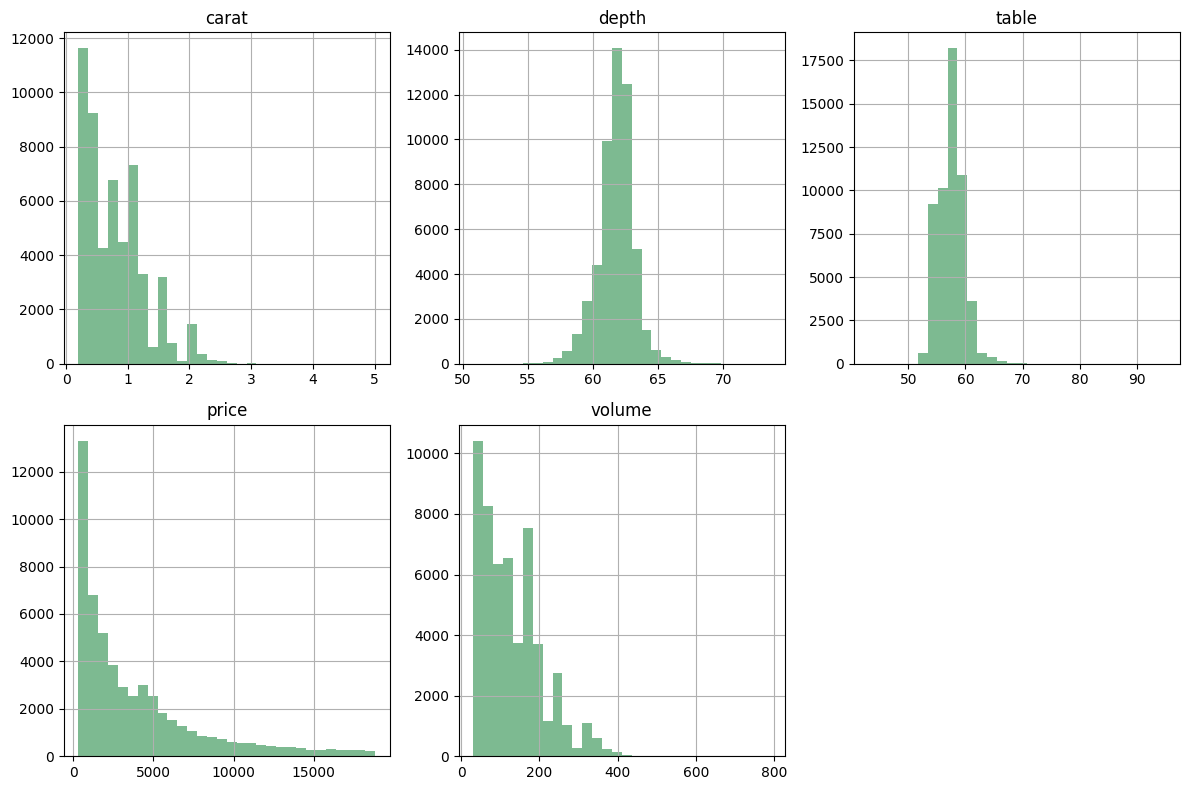

In [118]:
num_cols = ['carat', 'depth', 'table', 'price', 'volume']
cleaned_diamonds[num_cols].hist(
    bins=30, 
    figsize=(12,8), 
    layout=(2,3),  # 2行3列（最后一个空着也没关系）
)
plt.tight_layout()
plt.show()

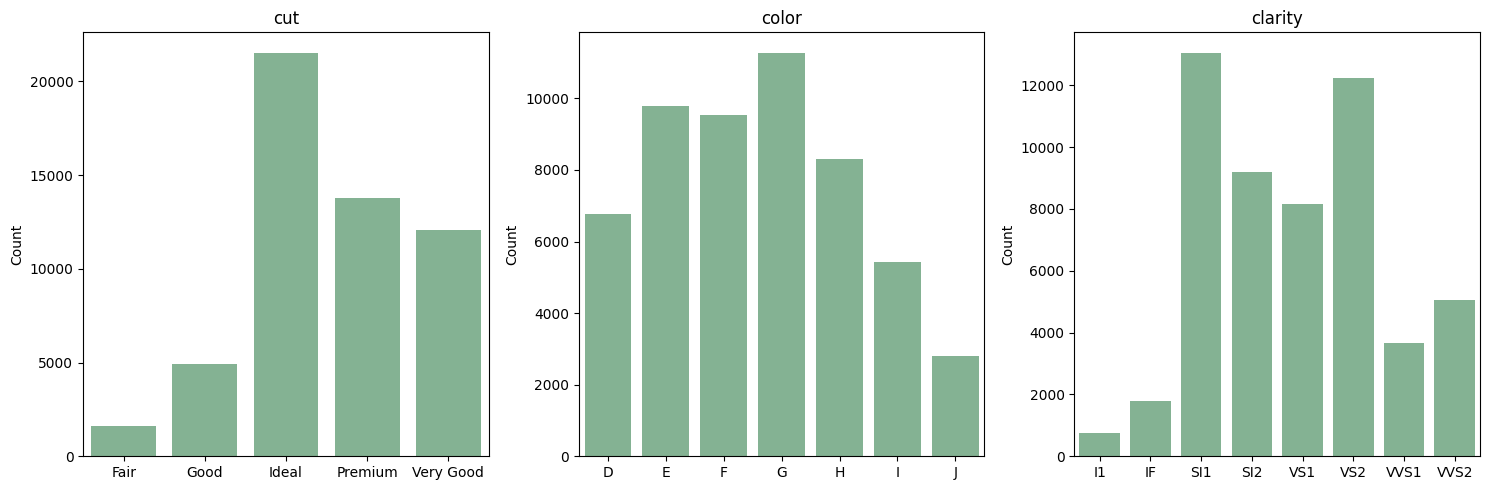

In [127]:
cat_cols = ['cut', 'color', 'clarity']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 一行三列

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=cleaned_diamonds, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Carat vs Price

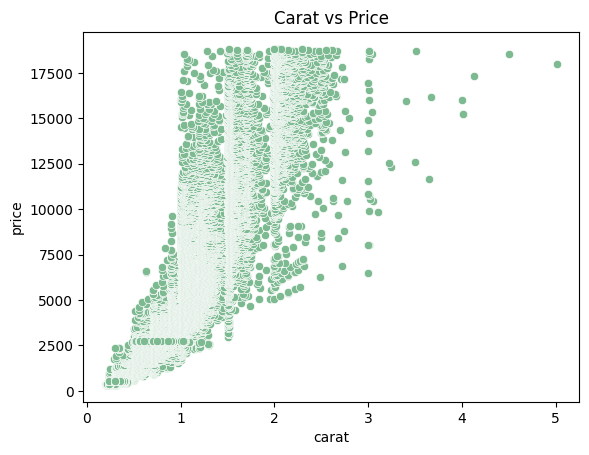

In [122]:
sns.scatterplot(x='carat', y='price', data=cleaned_diamonds)
plt.title("Carat vs Price")
plt.show()

In [123]:
# 对数转换（避免 log(0) 报错）
cleaned_diamonds = cleaned_diamonds[cleaned_diamonds['price'] > 0]
cleaned_diamonds = cleaned_diamonds[cleaned_diamonds['carat'] > 0]

cleaned_diamonds['log_price'] = np.log(cleaned_diamonds['price'])
cleaned_diamonds['log_carat'] = np.log(cleaned_diamonds['carat'])

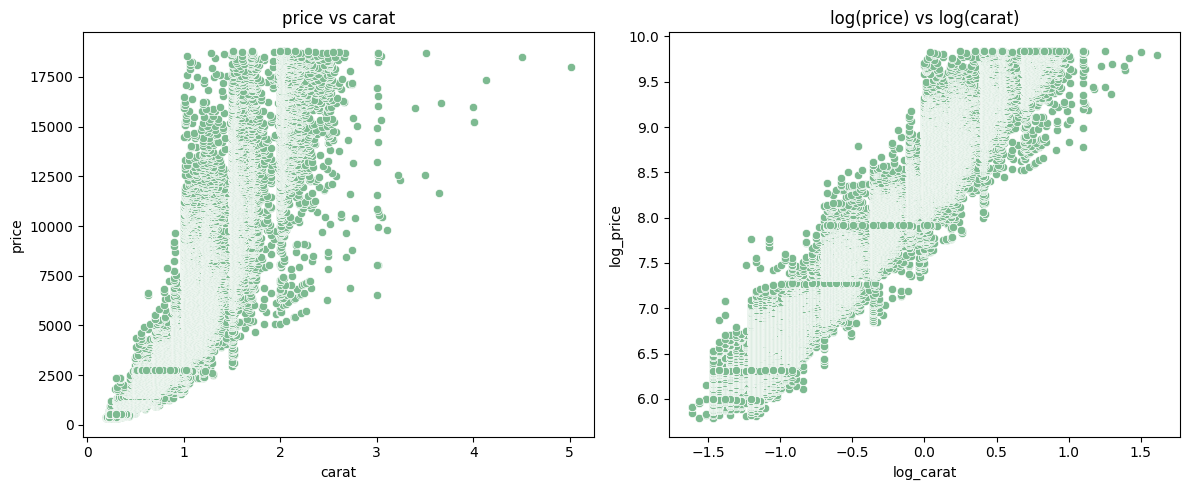

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 原始关系：price vs carat
sns.scatterplot(x='carat', y='price', data=cleaned_diamonds, ax=axes[0])
axes[0].set_title("price vs carat")

# 对数关系：log(price) vs log(carat)
sns.scatterplot(x='log_carat', y='log_price', data=cleaned_diamonds, ax=axes[1])
axes[1].set_title("log(price) vs log(carat)")

plt.tight_layout()
plt.show()

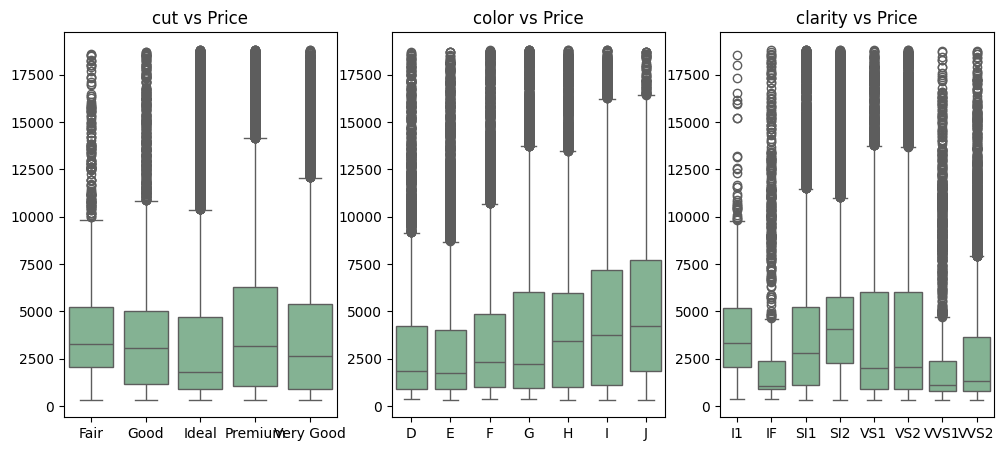

In [135]:
fig,axes = plt.subplots(1, 3, figsize=(12,5))
for i,col in enumerate(['cut', 'color', 'clarity']):
    sns.boxplot(x=col, y='price', data=cleaned_diamonds,ax=axes[i])
    axes[i].set_title(f"{col} vs Price")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.show()

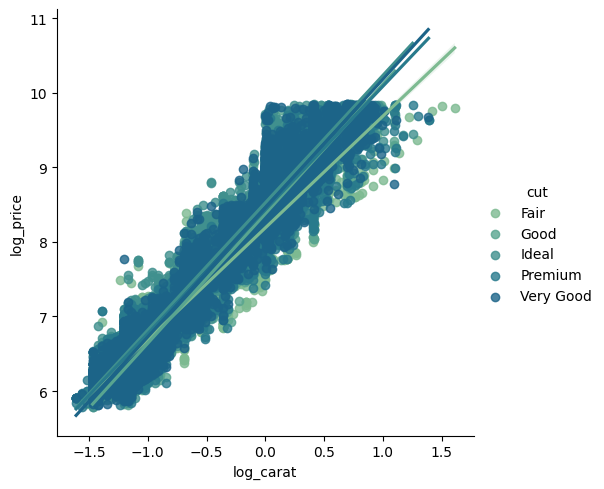

In [139]:
sns.lmplot(x='log_carat', y='log_price', hue='cut', data=cleaned_diamonds)

In [159]:
cleaned_diamonds['log_volume'] = np.log(cleaned_diamonds['volume'])

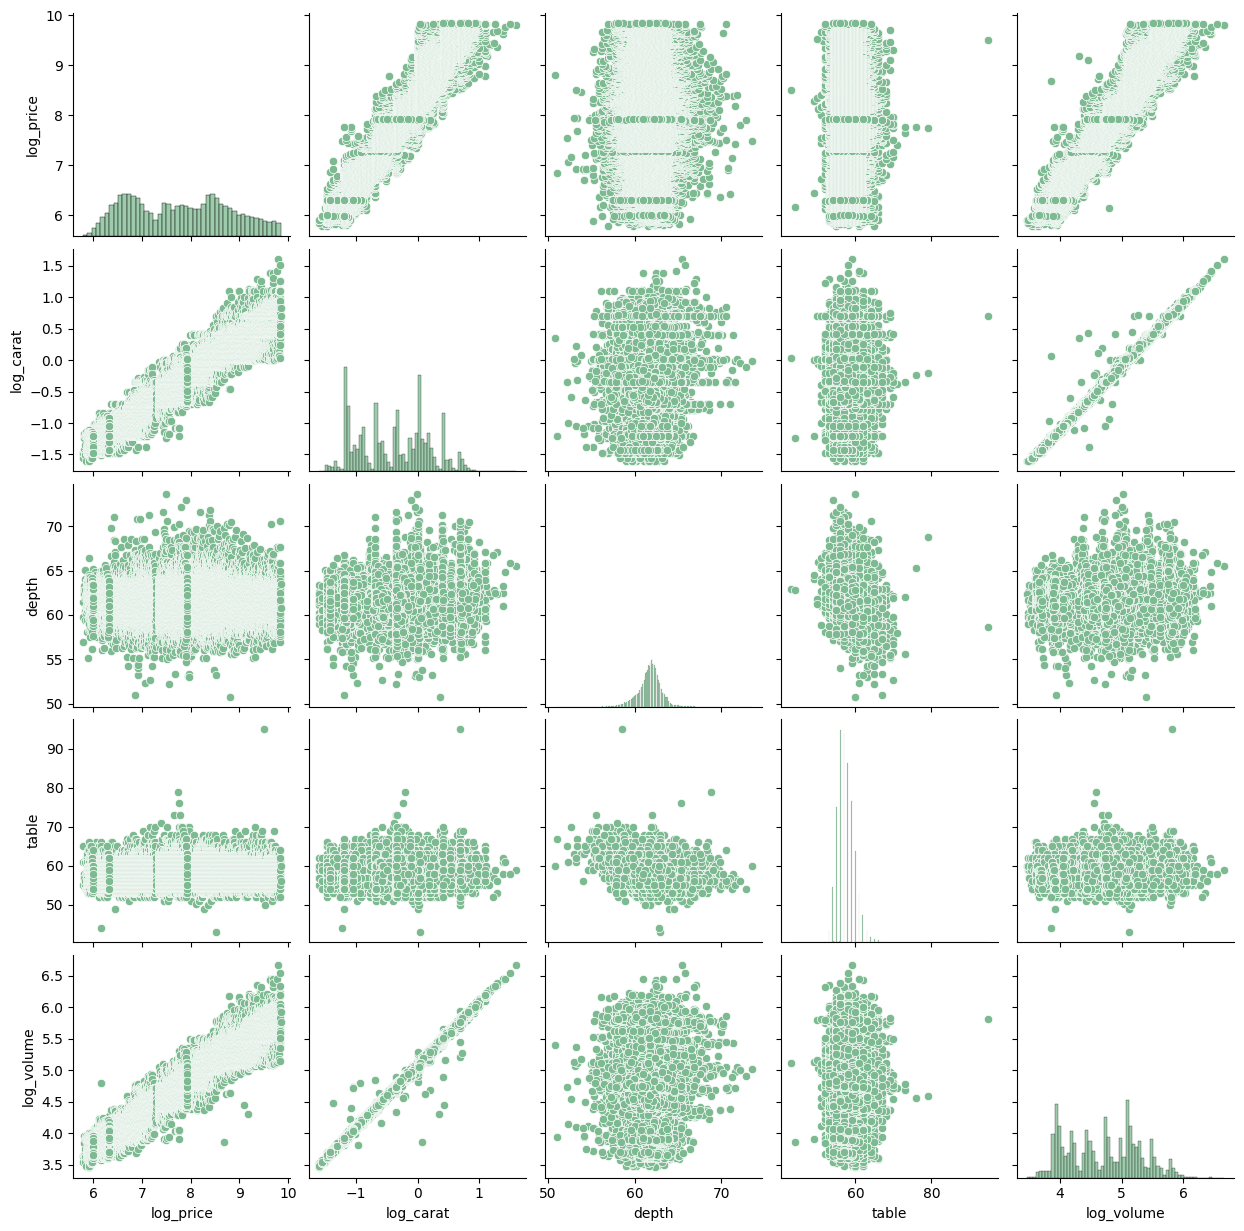

In [160]:
sns.pairplot(cleaned_diamonds[['log_price','log_carat','depth','table','log_volume']])
plt.show()